In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
# define the feature names:
feat_names=['age','bp','sg','al','su','rbc','pc',
'pcc','ba','bgr','bu','sc','sod','pot','hemo',
'pcv','wbcc','rbcc','htn','dm','cad','appet','pe',
'ane','classk']
feat_cat=np.array(['num','num','cat','cat','cat','cat','cat','cat','cat',
         'num','num','num','num','num','num','num','num','num',
         'cat','cat','cat','cat','cat','cat','cat'])

In [16]:
xx=pd.read_csv("data/chronic_kidney_disease_v2.arff",sep=',',
    skiprows=29,names=feat_names,
    header=None,na_values=['?','\t?'],)
xx.describe().T # 400 −N is the number of missing values

,count,mean,std,min,25%,50%,75%,max
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000
pot,312.0,4.627244,3.193904,2.500,3.80,4.40,4.90,47.000


In [9]:
Np,Nf=xx.shape
xx.shape

(400, 25)

In [26]:
target_names = ['notckd','ckd']# for the final plots
mapping={
    'normal':0,
    'abnormal':1,
    'present':1,
    'notpresent':0,
    'yes':1,
    ' yes':1,
    'no':0,
    '\tno':0,
    '\tyes':1,
    'ckd':1,
    'notckd':0,
    'poor':1,
    'good':0,
    'ckd\t':1}
xx=xx.replace(mapping.keys(),mapping.values())
print('cardinality of each feature:')
print(xx.nunique())# show the cardinality of each feature in the dataset; in particular classk should have only two possible values

cardinality of each feature:
age        76
bp         10
sg          5
al          6
su          6
rbc         2
pc          2
pcc         2
ba          2
bgr       146
bu        118
sc         84
sod        34
pot        40
hemo      115
pcv        42
wbcc       89
rbcc       45
htn         2
dm          2
cad         2
appet       2
pe          2
ane         2
classk      2
dtype: int64


/var/folders/r5/tmz4tmxn6s5f_cnt2d3y0pv00000gn/T/ipykernel_28203/4293192050.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  xx=xx.replace(mapping.keys(),mapping.values())


In [27]:
print(xx.bp.unique())
print(xx.al.unique()) # 5 corresponding to very low values of albumine and most dangerous

[ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
[ 1.  4.  2.  3.  0. nan  5.]


In [28]:
xx.info()
xx.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    float64
 6   pc      335 non-null    float64
 7   pcc     396 non-null    float64
 8   ba      396 non-null    float64
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    float64
 19  dm      398 non-null    float64
 20  cad     398 non-null    float64
 21  appet   399 non-null    float64
 22  pe

age       391
bp        388
sg        353
al        354
su        351
rbc       248
pc        335
pcc       396
ba        396
bgr       356
bu        381
sc        383
sod       313
pot       312
hemo      348
pcv       329
wbcc      294
rbcc      269
htn       398
dm        398
cad       398
appet     399
pe        399
ane       399
classk    400
dtype: int64

In [29]:
miss_values = xx.isnull().sum(axis=1)
miss_values.value_counts()

0     158
1      45
3      37
5      33
2      33
4      31
7      20
9      12
6      12
8       8
11      7
10      4
Name: count, dtype: int64

### Missing Values

In [ ]:
x=xx.copy()
x=x.dropna(thresh=19) # drop rows with at least 19 non-missing values
x.reset_index(drop=True, inplace=True)# necessary to have index without "jumps"
n=x.isnull().sum(axis=1)# check the number of missing values in each row
print(n.value_counts())

0    158
1     45
3     37
5     33
2     33
4     31
6     12
Name: count, dtype: int64


In [ ]:
# take the rows with exctly Nf=25 useful features; this is going to be the training dataset
# for regression
Xtrain=x.dropna(thresh=25) # drop rows with less than 25 non-missing values
Xtrain.reset_index(drop=True, inplace=True)# # necessary to have index without ”jumps”

mm=Xtrain.mean(axis=0)
ss=Xtrain.std(axis=0)
Xtrain_norm=(Xtrain-mm)/ss # standardize the training dataset

In [32]:
#%% normalize the entire dataset using the coeffs found for the training dataset at least 19 features
X_norm=(x-mm)/ss
Np,Nf=X_norm.shape

print('Number of points in the training dataset: ',Xtrain.shape)

Number of points in the training dataset:  (158, 25)


#### Linear Regression

In [ ]:
#%% run linear regression using least squares on all the missing data
# hide the info lines of the regression
import warnings
warnings.filterwarnings("ignore")
for kk in range(Np):
    xrow=X_norm.iloc[kk]#k-th row
    mask=xrow.isna()# columns with nan in row k
    Data_tr_norm=Xtrain_norm.loc[:,~mask]# remove the columns from the training dataset
    y_tr_norm=Xtrain_norm.loc[:,mask]# columns to be regressed
    w1=np.linalg.inv(np.dot(Data_tr_norm.T,Data_tr_norm))
    w=np.dot(np.dot(w1,Data_tr_norm.T),y_tr_norm)# weight vector
    ytest_norm=np.dot(X_norm.loc[kk,~mask],w)
    X_norm.iloc[kk][mask]=ytest_norm # substitute nan with regressed values
x_new=X_norm*ss+mm # denormalize normalized data * std + mean

In [ ]:
#%% manage categorical features
# get the possible values (i.e. alphabet) for the categorical features
# The following lines substitute the regressed numerical values with the closest value in the
# alphabet
alphabets=[]
for k in range(len(feat_cat)):
    if feat_cat[k]=='cat':
        val=Xtrain[Xtrain.columns[k]].unique()
        alphabets.append(np.sort(val))
    else:
        alphabets.append('num')
index=np.argwhere(feat_cat=='cat').flatten()
for k in index:
    val=alphabets[k].flatten()
    c=x_new[x_new.columns[k]].values
    val = val.reshape(1,-1) # force row vector
    c=c.reshape(-1,1) # force column vector
    d=(val-c)**2 # find the square distances
    ii=d.argmin(axis=1) # find the closest categorical value
    cc=val[0,ii] # cc contains only the categorical values
    x_new[x_new.columns[k]]=cc
print(x_new.nunique())
print(x_new.describe().T)

age        73
bp          9
sg          5
al          5
su          6
rbc         2
pc          2
pcc         2
ba          2
bgr       136
bu        107
sc         75
sod        33
pot        40
hemo      112
pcv        41
wbcc       89
rbcc       45
htn         2
dm          2
cad         2
appet       2
pe          2
ane         2
classk      2
dtype: int64
        count         mean          std       min      25%      50%       75%  \
age     343.0    50.781341    16.938537     3.000    41.00    53.00    63.500   
bp      341.0    76.041056    13.736536    50.000    70.00    80.00    80.000   
sg      349.0     1.017063     0.006197     1.005     1.01     1.02     1.020   
al      349.0     0.945559     1.328258     0.000     0.00     0.00     2.000   
su      349.0     0.424069     1.079109     0.000     0.00     0.00     0.000   
rbc     349.0     0.123209     0.329149     0.000     0.00     0.00     0.000   
pc      349.0     0.203438     0.403134     0.000     0.00     0.00   

### (cumulative distribution function, it is sufficient to sort the data, think of it!).
 if it was done correctly, then the histograms or the cumulative probability distributions of X new should be equal to those of the original DataFrame xx.

You should measure/evaluate/know the joint pdf of all the features,
derive the conditional pdf of the missing feature given all the remaining ones and substitute
the missing value with its maximum likelihood estimate (or MAP estimate), but this is very
hard to do.
22/30


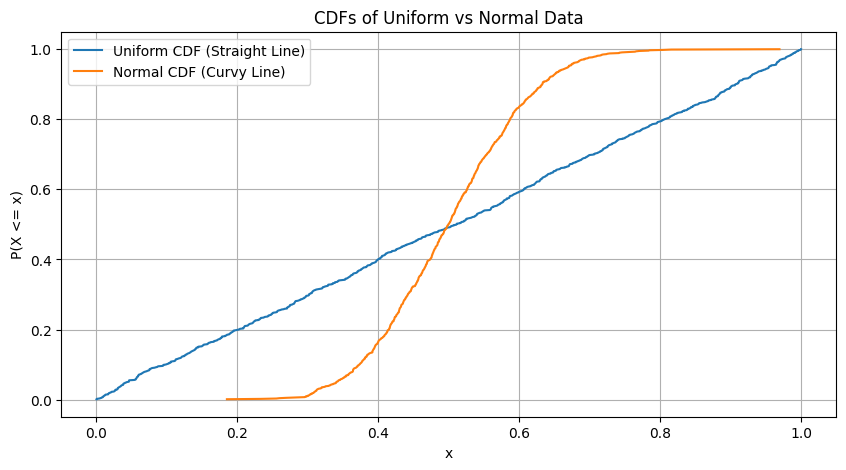

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate data
uniform_data = np.random.uniform(0, 1, 1000)  # Uniform distribution
normal_data = np.random.normal(0.5, 0.1, 1000)  # Normal distribution

# Sort data for CDF
uniform_sorted = np.sort(uniform_data)
normal_sorted = np.sort(normal_data)

# Compute cumulative probabilities
uniform_cdf = np.arange(1, len(uniform_sorted) + 1) / len(uniform_sorted)
normal_cdf = np.arange(1, len(normal_sorted) + 1) / len(normal_sorted)

# Plot CDFs
plt.figure(figsize=(10, 5))
plt.plot(uniform_sorted, uniform_cdf, label='Uniform CDF (Straight Line)')
plt.plot(normal_sorted, normal_cdf, label='Normal CDF (Curvy Line)')
plt.title('CDFs of Uniform vs Normal Data')
plt.xlabel('x')
plt.ylabel('P(X <= x)')
plt.legend()
plt.grid()
plt.show()


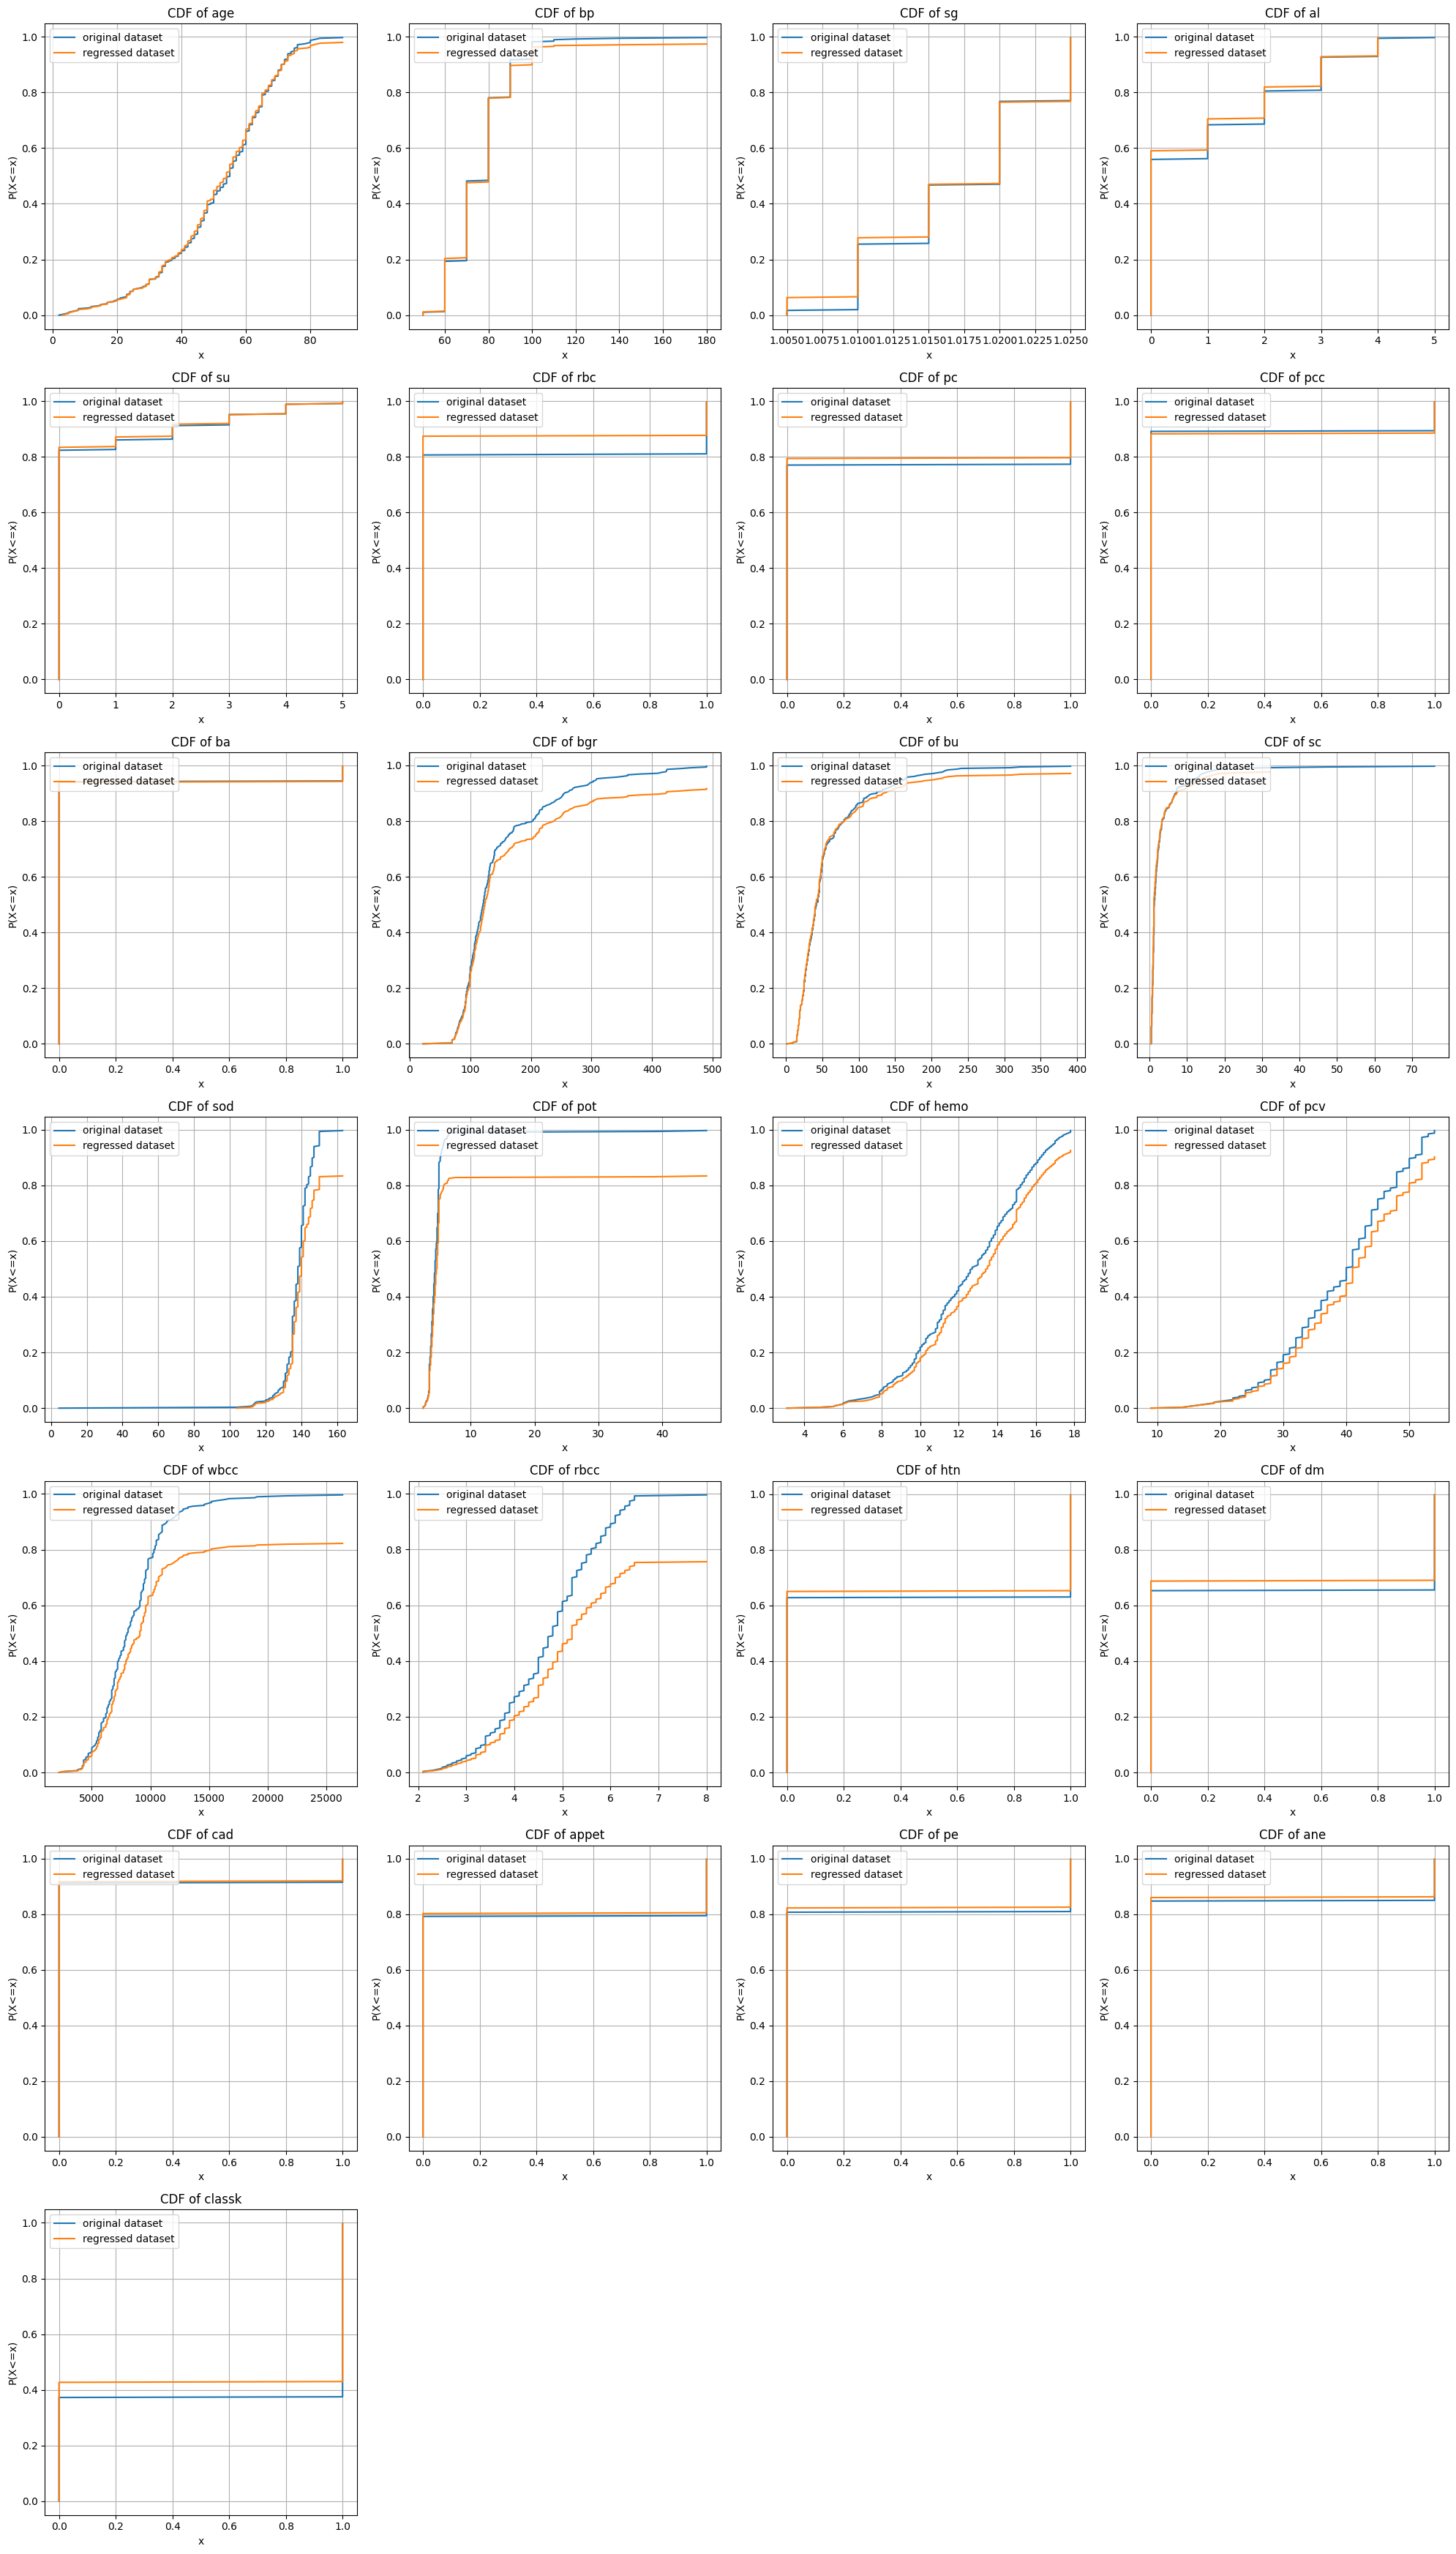

In [38]:
import matplotlib.pyplot as plt
import numpy as np

L = x_new.shape[0]
plotCDF = True  # Change to True to enable plotting

if plotCDF:
    rows = (Nf + 3) // 4  # Calculate the number of rows needed for 4 plots per row
    fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 5))  # Create subplots
    axes = axes.flatten()  # Flatten the axes array for easier indexing
    
    for k in range(Nf):
        a = xx[xx.columns[k]].dropna()
        M = a.shape[0]
        
        # Plot on the corresponding subplot
        axes[k].plot(np.sort(a), np.arange(M) / M, label='original dataset')
        axes[k].plot(np.sort(x_new[x_new.columns[k]]), np.arange(L) / L, label='regressed dataset')
        axes[k].set_title('CDF of ' + xx.columns[k])
        axes[k].set_xlabel('x')
        axes[k].set_ylabel('P(X<=x)')
        axes[k].grid()
        axes[k].legend(loc='upper left')
    
    # Remove any unused subplots
    for i in range(Nf, len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()  # Adjust spacing between plots
    plt.show()

# 

Other ways to manage missing values ?

- categorical numerical # REMOVE THE CATEGORICAL FEATURES
value value
“A” 0
“B” 1
“C” 2
“?” 3 # 3 is not present in the dataset

- For numerical features, missing values can be replaced by the mean or median:

Mean: Simple but sensitive to outliers.
Median: More robust to outliers and often preferred.

-For categorical features, replace missing values with the mode (most frequent value).

-Advanced methods (e.g., sampling from the feature's PDF) are possible but ignore correlations between features. A better approach would involve estimating the conditional PDF using all features, but this is complex and rarely used in practice.

## Decision (Classification) Tree

In [43]:
#%%------------------ Decision trees -------------------
# Let us use only the complete data (no missing values)
target = Xtrain.classk
inform = Xtrain.drop('classk', axis=1)
clfXtrain = tree.DecisionTreeClassifier(criterion='entropy',random_state=4)
clfXtrain = clfXtrain.fit(inform,target)
test_pred = clfXtrain.predict(x_new.drop('classk', axis=1))

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print('Performance of the decision tree based on the training dataset only:')
print('accuracy =', accuracy_score(x_new.classk,test_pred))
print(confusion_matrix(x_new.classk,test_pred))

Performance of the decision tree based on the training dataset only:
accuracy = 0.9197707736389685
[[150   0]
 [ 28 171]]


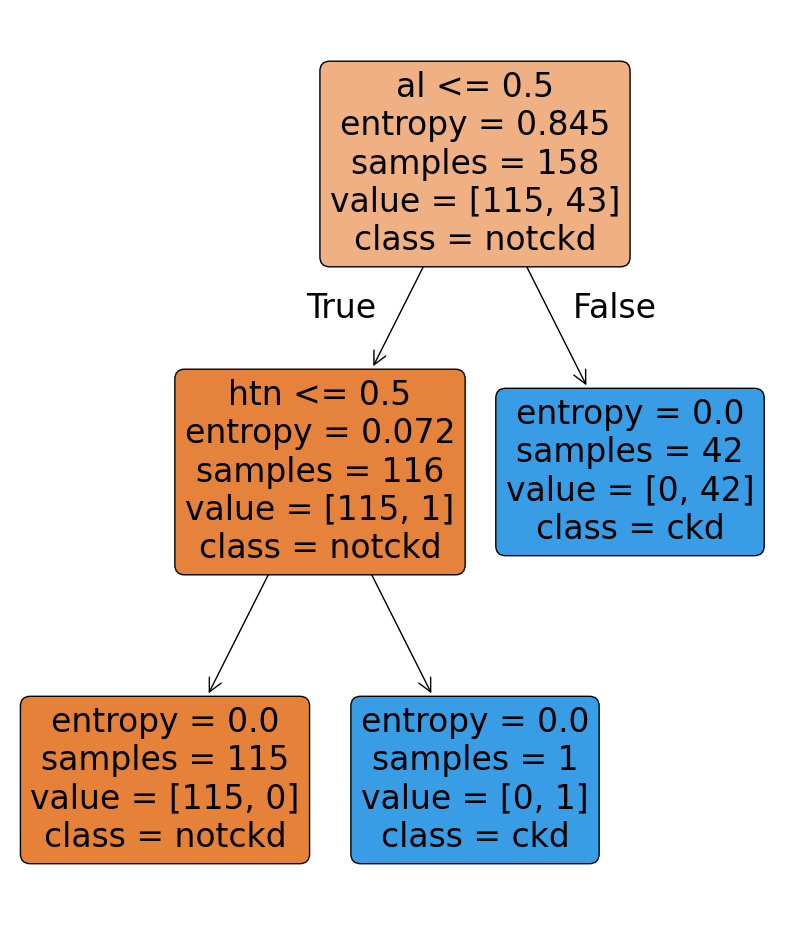

In [49]:
plt.figure(figsize=(10,12))
tree.plot_tree(clfXtrain,feature_names=feat_names[:24],
               class_names=target_names,rounded=True,
               proportion =False ,filled = True )
plt.savefig('fig_training.png' )

## TODO

In [53]:
xx.shape

(400, 25)

#### 3. Fill missing Values with Median

In [56]:
# Assume 'xx' is the original dataset
Xtrain = xx  # Original dataset
median_values = xx.median()  # Calculate median for numeric columns

# Create a copy of xx to store the new dataset with median values for missing data
y_new = xx.copy()

# Replace missing values in numeric columns with their median
for column in xx.columns:
    if xx[column].dtype != 'object':  # Check if the column is numeric
        median_val = median_values[column]
        y_new[column].fillna(median_val, inplace=True)  # Replace NaN with median

# Ensure y_new still has the same number of rows (should already be 400)
print("Shape of y_new:", y_new.shape)
print("Missing values per column:\n", y_new.isnull().sum())


Shape of y_new: (400, 25)
Missing values per column:
 age       0
bp        0
sg        0
al        0
su        0
rbc       0
pc        0
pcc       0
ba        0
bgr       0
bu        0
sc        0
sod       0
pot       0
hemo      0
pcv       0
wbcc      0
rbcc      0
htn       0
dm        0
cad       0
appet     0
pe        0
ane       0
classk    0
dtype: int64


#### 4. Random Forest Classifier

Random Forest (100 trees):
Accuracy: 1.0
Confusion Matrix:
 [[150   0]
 [  0 250]]

Random Forest (1000 trees):
Accuracy: 1.0
Confusion Matrix:
 [[150   0]
 [  0 250]]


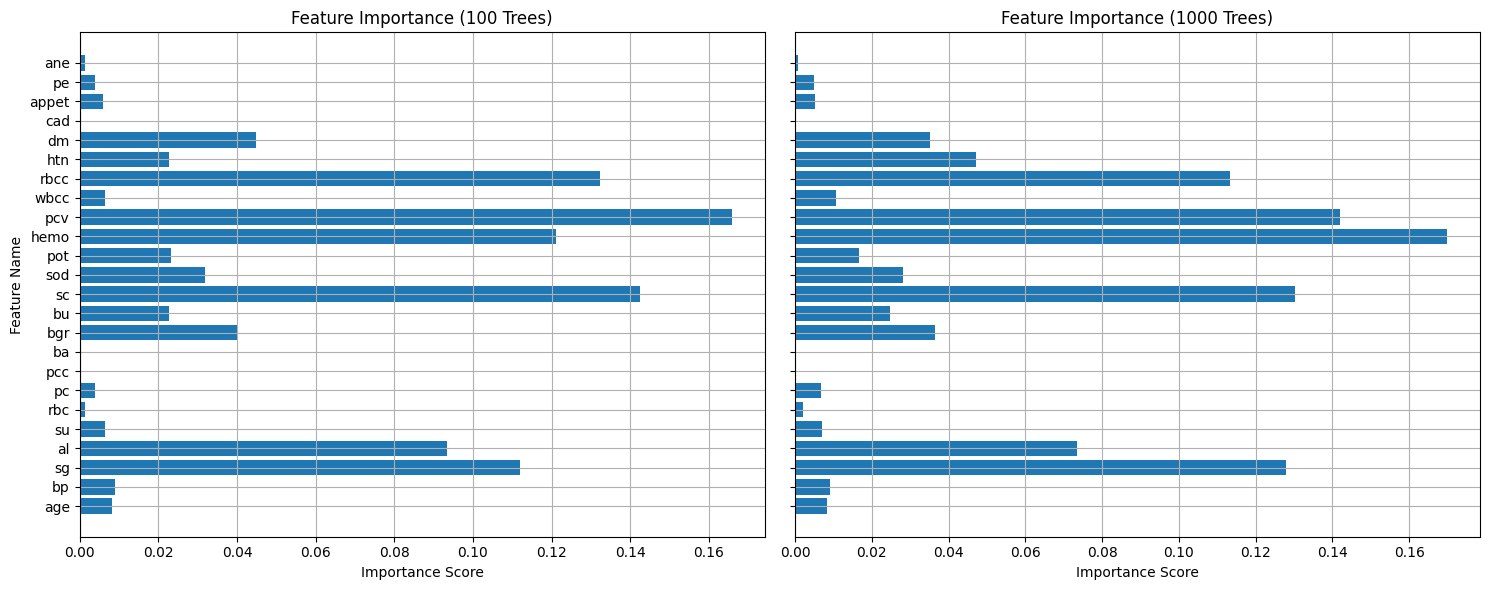

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Define feature names (excluding the target column)
feature_names = x_new.columns[:-1]  # Assuming 'classk' is the target

# Prepare features and target for x_new
x_new_features = x_new.drop('classk', axis=1)
x_new_target = x_new['classk']

# Prepare features and target for y_new
y_new_features = y_new.drop('classk', axis=1)
y_new_target = y_new['classk']

# Random Forest with 100 trees
rf_100 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_100.fit(x_new_features, x_new_target)
rf_100_pred = rf_100.predict(y_new_features)

# Random Forest with 1000 trees
rf_1000 = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_1000.fit(x_new_features, x_new_target)
rf_1000_pred = rf_1000.predict(y_new_features)

# Evaluate performance
print("Random Forest (100 trees):")
print("Accuracy:", accuracy_score(y_new_target, rf_100_pred))
print("Confusion Matrix:\n", confusion_matrix(y_new_target, rf_100_pred))

print("\nRandom Forest (1000 trees):")
print("Accuracy:", accuracy_score(y_new_target, rf_1000_pred))
print("Confusion Matrix:\n", confusion_matrix(y_new_target, rf_1000_pred))

# Feature Importance Plot for both models
importance_100 = rf_100.feature_importances_
importance_1000 = rf_1000.feature_importances_

# Plot feature importance side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Random Forest with 100 trees
axes[0].barh(feature_names, importance_100, align='center')
axes[0].set_title("Feature Importance (100 Trees)")
axes[0].set_xlabel("Importance Score")
axes[0].set_ylabel("Feature Name")
axes[0].grid()

# Random Forest with 1000 trees
axes[1].barh(feature_names, importance_1000, align='center')
axes[1].set_title("Feature Importance (1000 Trees)")
axes[1].set_xlabel("Importance Score")
axes[1].grid()

# Adjust layout
plt.tight_layout()
plt.show()


#### 5.1 5.2 Split Train,Test 50% - CART

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Split y_new into training and testing datasets (50% each), shuffled without a fixed seed
features = y_new.drop('classk', axis=1)  # All features
target = y_new['classk']  # Target column

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.5, shuffle=True)

# 5.1 Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100)  # 100 trees
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

# Evaluate Random Forest
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))

# 5.2 CART Decision Tree Classifier
cart_classifier = DecisionTreeClassifier(criterion='entropy')  # CART using entropy
cart_classifier.fit(X_train, y_train)
cart_predictions = cart_classifier.predict(X_test)

# Evaluate CART Decision Tree
print("\nCART Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, cart_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, cart_predictions))


Random Forest Classifier:
Accuracy: 0.99
Confusion Matrix:
 [[ 78   0]
 [  2 120]]

CART Decision Tree Classifier:
Accuracy: 0.97
Confusion Matrix:
 [[ 78   0]
 [  6 116]]


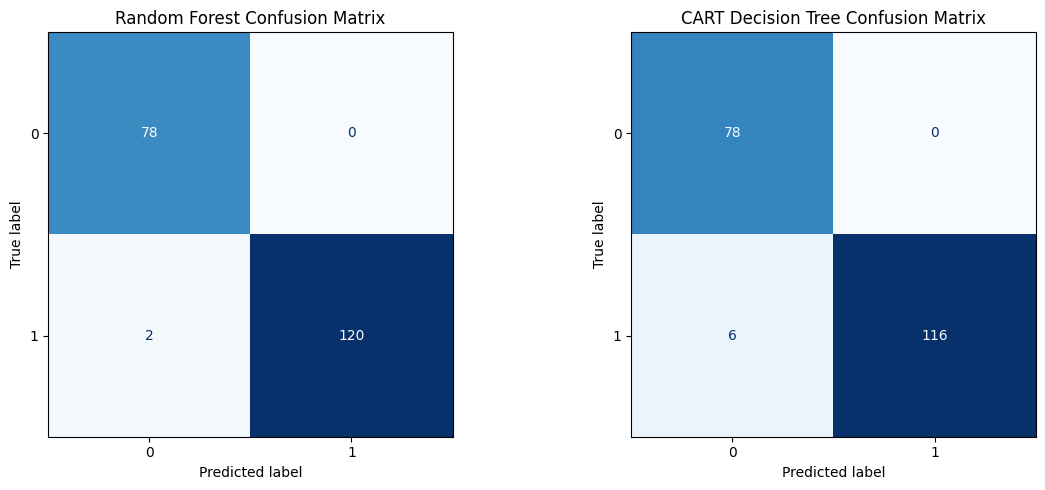

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Random Forest Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf_classifier, X_test, y_test, ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title("Random Forest Confusion Matrix")

# Decision Tree Confusion Matrix
ConfusionMatrixDisplay.from_estimator(cart_classifier, X_test, y_test, ax=axes[1], cmap='Blues', colorbar=False)
axes[1].set_title("CART Decision Tree Confusion Matrix")

plt.tight_layout()
plt.show()


Serum Creatinine (sc) and Blood Urea (bu):
Key markers for kidney function; high levels indicate reduced kidney efficiency.
Specific Gravity (sg):
Reflects the kidney's ability to concentrate urine.
Hemoglobin (hemo) and Red Blood Cell Count (rbcc):
CKD often causes anemia, so these features are expected to be important.
White Blood Cell Count (wbcc):
Can indicate inflammation or infection, which might occur in CKD patients.